Dalberg Insights - Tech Fellow Task Application

19th June 2025
# Enhancing Healthcare Accessibility in Nairobi County.

Assignment:
Assume that you are a Data Scientist working at Dalberg Data Insights (DDI) who has been staffed on this project. Your role is to analyze and interpret the data to propose actionable recommendations for improving access to Quality Healthcare in Nairobi. Your findings will help the Nairobi County Health Officer prioritize investments and make the best use of the recently secured grant to address critical gaps in the healthcare system.

Deliverables: 
- Prepare a six-slide presentation (excluding the cover page) for the client, highlighting your initial hypothesis on where the investments should be directed.
- Your hypothesis should be supported by evidence, including clear and compelling visualizations derived from the data given to you.
- Please explicitly state all assumptions made.

My Approach:

Problem Framing 
1. What is the government health facilities to population ratio per sub-county? 
2. What is the PHC services gap per sub-county?

Analysis (Government Health Care Accessibility & Availability of Primary Health Care Services)

- Government Health Care Accessibility Analysis: Facility to Population Ratio per Sub-County (Further divided by government and private facilities)
- PHC Service Gap Analysis: PHC services per Sub-County.

## Step 1: Preparing the Data

In [4]:
# Importing pandas and numpy for querying the datasets
import pandas as pd
import numpy as np

# Importing the datasets
health_facilities_df = pd.read_excel ('health_facilities.xlsx')
population_df = pd.read_csv ('demographic_data.csv')

# Displaying the first three rows of each dataset
print (health_facilities_df.head(3))
print (population_df.head(3))

   Facility Code                                Facility Name     Province  \
0          19224                       CDF Kiriari Dispensary      Eastern   
1          19310   St Jude's Huruma Community Health Services      Nairobi   
2          14180                              10 Engineer VCT  Rift Valley   

     County       District  Division            Type  \
0      Embu       Manyatta  Manyatta      Dispensary   
1   Nairobi        Mathare    Huruma  Medical Clinic   
2  Laikipia  Laikipia East   Central      Dispensary   

                            Owner Location Sub Location  ...  IPD OPD  \
0              Ministry of Health   Ruguru       Ruguru  ...  NaN NaN   
1  Private Practice - Unspecified   Huruma       Huruma  ...  NaN NaN   
2                    Armed Forces  Nanyuki      Majengo  ...  NaN NaN   

  OUTREACH  PMTCT  RAD/XRAY RHTC/RHDC TB DIAG TB LABS TB TREAT YOUTH  
0      NaN    NaN       NaN       NaN     NaN     NaN      NaN   NaN  
1      NaN    NaN       NaN

In [8]:
# Cleaning sub-county and county names (uppercase and strip whitespace) & renaming the total column
population_df['sub-county'] = population_df['sub-county'].str.upper().str.strip()
population_df['county'] = population_df['county'].str.upper().str.strip()
population_df = population_df.rename(columns = {'Total': 'total_population'})

# Filtering for Nairobi County and excluding "ALL" and " NJIRU" rows (No data is available in the health facilities dataset for Njiru)
population_filtered = population_df[
                     (population_df['county'] == "NAIROBI") & 
                     (population_df['sub-county'] != "ALL") & 
                     (population_df['sub-county'] != "NJIRU")].copy()

# Mapping constituencies to sub-counties
constituency_to_subcounty = {
    # Dagoretti
    "DAGORETTI NORTH": "DAGORETTI",
    "DAGORETTI SOUTH": "DAGORETTI",
    
    # Embakasi
    "EMBAKASI EAST": "EMBAKASI",
    "EMBAKASI WEST": "EMBAKASI",
    "EMBAKASI CENTRAL": "EMBAKASI",
    "EMBAKASI SOUTH": "EMBAKASI",
    "EMBAKASI NORTH": "EMBAKASI",
    
    # Kasarani 
    "RUARAKA": "KASARANI",
    "ROYSAMBU": "KASARANI",
    "KASARANI": "KASARANI",
    
    # Others (constituency = sub-county)
    "KAMUKUNJI": "KAMUKUNJI",
    "KIBRA": "KIBRA",
    "LANG'ATA": "LANG'ATA",
    "MATHARE": "MATHARE", 
    "STAREHE": "STAREHE",
    "MAKADARA": "MAKADARA",
    "WESTLANDS": "WESTLANDS",
}

# Applying mapping to health facilities data
health_facilities_df['sub-county'] = (health_facilities_df['Constituency'].str.upper().str.strip().map(constituency_to_subcounty))

# Aggregating health facilities by sub-county
facilities_agg = health_facilities_df.groupby('sub-county').agg(
    
    # Basic counts
    num_facilities=('Facility Name', 'count'),
    total_beds=('Beds', 'sum'),
    total_cots=('Cots', 'sum'),
    
    # Primary Health Care service indicators (count of 'Yes')
    has_ANC=('ANC', lambda x: (x == 'Y').sum()),
    has_ART=('ART', lambda x: (x == 'Y').sum()),
    has_BEOC=('BEOC', lambda x: (x == 'Y').sum()),
    has_BLOOD=('BLOOD', lambda x: (x == 'Y').sum()),
    has_CAES_SEC=('CAES SEC', lambda x: (x == 'Y').sum()),
    has_CEOC=('CEOC', lambda x: (x == 'Y').sum()),
    has_C_IMCI=('C-IMCI', lambda x: (x == 'Y').sum()),
    has_EPI=('EPI', lambda x: (x == 'Y').sum()),
    has_FP=('FP', lambda x: (x == 'Y').sum()),
    has_GROWM=('GROWM', lambda x: (x == 'Y').sum()),
    has_HBC=('HBC', lambda x: (x == 'Y').sum()),
    has_HCT=('HCT', lambda x: (x == 'Y').sum()),
    has_IPD=('IPD', lambda x: (x == 'Y').sum()),
    has_OPD=('OPD', lambda x: (x == 'Y').sum()),
    has_OUTREACH=('OUTREACH', lambda x: (x == 'Y').sum()),
    has_PMTCT=('PMTCT', lambda x: (x == 'Y').sum()),
    has_RAD_XRAY=('RAD/XRAY', lambda x: (x == 'Y').sum()),
    has_RHTC_RHDC=('RHTC/RHDC', lambda x: (x == 'Y').sum()),
    has_TB_DIAG=('TB DIAG', lambda x: (x == 'Y').sum()),
    has_TB_LABS=('TB LABS', lambda x: (x == 'Y').sum()),
    has_TB_TREAT=('TB TREAT', lambda x: (x == 'Y').sum()),
    has_YOUTH=('YOUTH', lambda x: (x == 'Y').sum()),
    
    # Operational Indicators
    facilities_operational = ('Operational Status', lambda x: (x == 'Operational').sum()),
    facilities_non_operational = ('Operational Status', lambda x: (x != 'Operational').sum()),
    gov_facilities_operational = ('Operational Status', lambda x: ((x == 'Operational') & (health_facilities_df['Owner'] == 'Ministry of Health')).sum()),
    private_facilities_operational = ('Operational Status', lambda x: ((x == 'Operational') & (health_facilities_df['Owner'] != 'Ministry of Health')).sum()),
    gov_facilities_non_operational = ('Operational Status', lambda x: ((x != 'Operational') & (health_facilities_df['Owner'] == 'Ministry of Health')).sum()),
    private_facilities_non_operational = ('Operational Status', lambda x: ((x != 'Operational') & (health_facilities_df['Owner'] != 'Ministry of Health')).sum()),

    # Government Ownership indicator
    govt_facilities=('Owner', lambda x: (x == 'Ministry of Health').sum())

).reset_index()


# Merging both datasets
nairobi_df = pd.merge(facilities_agg, population_filtered, on = 'sub-county', how = 'left')
nairobi_df['total_population'] = pd.to_numeric(nairobi_df['total_population'], errors='coerce')
              
print (nairobi_df.head (3))


  sub-county  num_facilities  total_beds  total_cots  has_ANC  has_ART  \
0  DAGORETTI             105       626.0       112.0        0       10   
1  DAGORETTI             105       626.0       112.0        0       10   
2  DAGORETTI             105       626.0       112.0        0       10   

   has_BEOC  has_BLOOD  has_CAES_SEC  has_CEOC  ...  \
0         0          0             0         0  ...   
1         0          0             0         0  ...   
2         0          0             0         0  ...   

   gov_facilities_operational  private_facilities_operational  \
0                           5                             100   
1                           5                             100   
2                           5                             100   

   gov_facilities_non_operational  private_facilities_non_operational  \
0                               0                                   0   
1                               0                                   0   
2 

## Step 2: Analysis
### Government Health Care Accessibility Analysis:
  
  1. What is the government health facilities to population ratio (GHFPR) per sub-county?
  2. How many operational health facilities are present per sub-county (gov vs private owned)?
  3. How does GHFPR (government healthcare accessibility) relate to private facility presence?


#### Government Health Facilities to Population Ratio (GHFPR) per sub-county

In [24]:
# Filtering to only include rows where Age = 'Total'
filtered_df = nairobi_df[nairobi_df['Age'] == 'Total'] 

# Creating a pivot table
pivot_table = filtered_df.pivot_table(values=['total_population', 'govt_facilities'], index='sub-county', aggfunc='sum')

# Calculating Government Health Facilities to Population Ratio (GHFPR) per 10,000
pivot_table['ghfpr'] = (pivot_table['govt_facilities'] / pivot_table['total_population']) * 10000
pivot_table['population_per_facility'] = pivot_table['total_population'] / pivot_table['govt_facilities']
pivot_table.sort_values(by ='ghfpr', ascending =False, inplace =True)

print(pivot_table)

            govt_facilities  total_population     ghfpr  \
sub-county                                                
KIBRA                    23          185768.0  1.238103   
LANG'ATA                  5          197472.0  0.253200   
MATHARE                   3          206550.0  0.145243   
KASARANI                  9          780619.0  0.115293   
DAGORETTI                 5          434177.0  0.115160   
WESTLANDS                 3          308839.0  0.097138   
MAKADARA                  1          189526.0  0.052763   
EMBAKASI                  5          988746.0  0.050569   
STAREHE                   1          210411.0  0.047526   
KAMUKUNJI                 1          268269.0  0.037276   

            population_per_facility  
sub-county                           
KIBRA                   8076.869565  
LANG'ATA               39494.400000  
MATHARE                68850.000000  
KASARANI               86735.444444  
DAGORETTI              86835.400000  
WESTLANDS             102

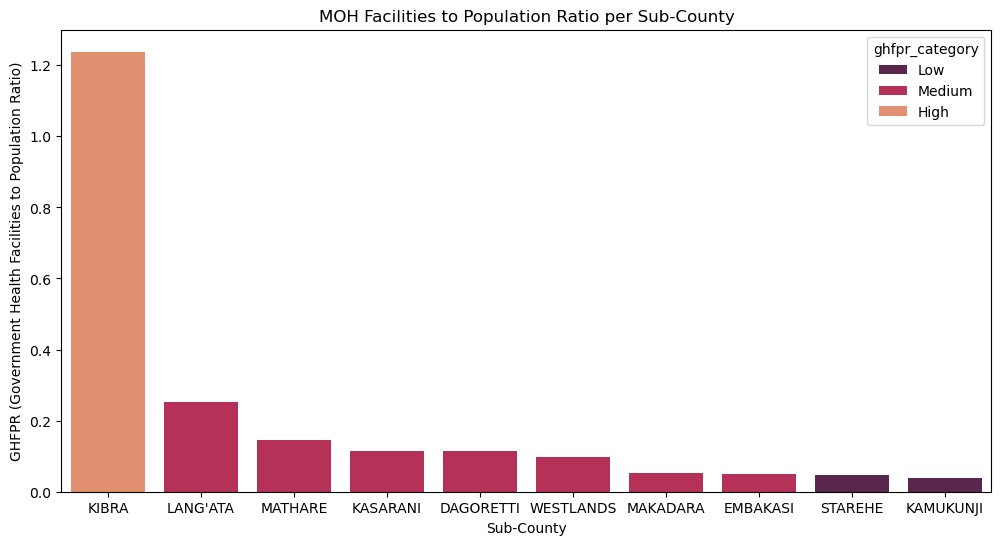

In [20]:
# Visualizing the results, importing visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns

# Defining GHFPR categories
pivot_table['ghfpr_category'] = pd.cut(pivot_table['ghfpr'], bins = [0, 0.05, 0.3, 1.3], labels =['Low', 'Medium', 'High'])

plt.figure(figsize=(12, 6))
sns.barplot(x = pivot_table.index, y = pivot_table['ghfpr'], hue = pivot_table['ghfpr_category'], palette = 'rocket')

plt.xlabel('Sub-County')
plt.ylabel('GHFPR (Government Health Facilities to Population Ratio)')
plt.title('MOH Facilities to Population Ratio per Sub-County')
plt.savefig("GHFPR_SubCounty_Analysis.png", dpi=300, bbox_inches='tight')

plt.show()

- Wide disparities in healthcare access – Kibra has the highest government health facility-to-population ratio (GHFPR: 1.24), indicating relatively better access, while sub-counties like Kamukunji (0.037) and Starehe (0.048) have the lowest.
- High population strain on facilities – Kamukunji, Starehe, and Embakasi each have only one facility serving over 190,000 people, suggesting potential overcrowding and service limitations.
- Uneven distribution of government health facilities – Some sub-counties (e.g., Kibra) have better access due to a higher number of facilities, while others (e.g., Makadara, Kamukunji) have disproportionately low facility coverage.
- Potential service demand challenges – Sub-counties with low GHFPR and high population per facility may experience longer wait times, resource shortages, and increased reliance on private healthcare options.

#### Operational health facilities per sub-county (gov vs private owned)

In [28]:
# Filtering to only include rows where Age = 'Total'
filtered_df = nairobi_df[nairobi_df['Age'] == 'Total'] 

# Creating a pivot table
pivot_table_2 = filtered_df.pivot_table(values = ['gov_facilities_operational', 'private_facilities_operational', 'gov_facilities_non_operational', 'private_facilities_non_operational', 'total_population'], index='sub-county', aggfunc='sum')
pivot_table_2 ['ghfpr'] = (pivot_table_2['gov_facilities_operational'] / pivot_table_2['total_population']) * 10000
print (pivot_table_2)

            gov_facilities_non_operational  gov_facilities_operational  \
sub-county                                                               
DAGORETTI                                0                           5   
EMBAKASI                                 0                           5   
KAMUKUNJI                                0                           1   
KASARANI                                 0                           9   
KIBRA                                    3                          20   
LANG'ATA                                 0                           5   
MAKADARA                                 0                           1   
MATHARE                                  0                           3   
STAREHE                                  0                           1   
WESTLANDS                                0                           3   

            private_facilities_non_operational  \
sub-county                                       
DAGORETTI  

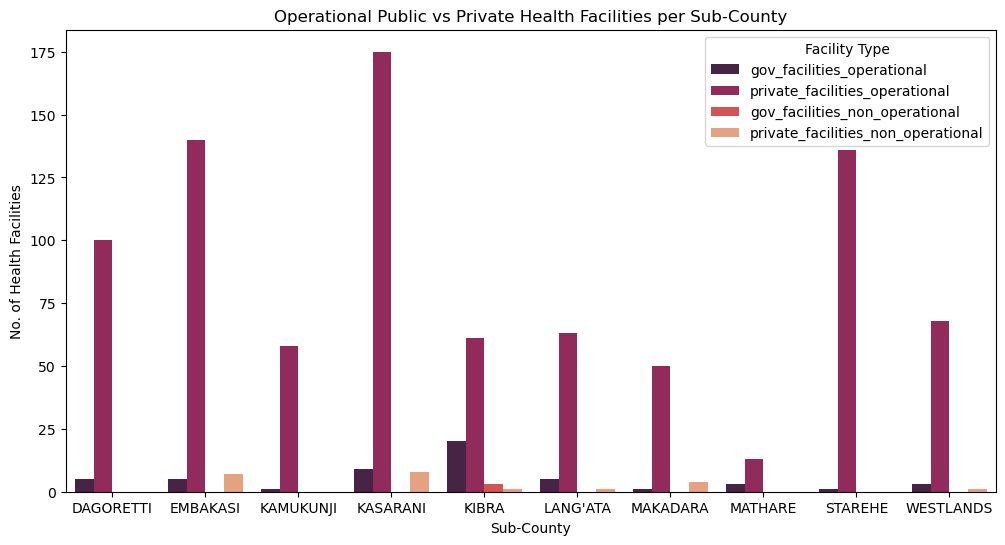

In [39]:
# Visualizing the results
plt.figure (figsize = (12,6))

pivot_melted = pivot_table_2.reset_index().melt(id_vars='sub-county', value_vars=['gov_facilities_operational', 'private_facilities_operational','gov_facilities_non_operational', 'private_facilities_non_operational'], var_name='Facility Type', value_name='Count')
sns.barplot(x='sub-county', y='Count', hue='Facility Type', data=pivot_melted, palette='rocket')

plt.xlabel ('Sub-County')
plt.ylabel ('No. of Health Facilities')
plt.title ('Operational Public vs Private Health Facilities per Sub-County')
plt.savefig("Operational_Facilities_SubCounty.png", dpi=300, bbox_inches='tight')

plt.show()


- Heavy reliance on private facilities in high-strain areas – Sub-counties like Kasarani, Embakasi, and Lang'ata, which had a low government health facility-to-population ratio (GHFPR) and high population per facility, also have a large number of operational private health facilities. This suggests that private sector healthcare is filling critical gaps where government services are insufficient.
- Limited government facility expansion despite demand – Sub-counties with extreme population strain on government facilities, such as Kamukunji and Starehe, also have few operational government facilities relative to private ones. This reinforces the accessibility challenge, where government healthcare is not expanding proportionally to population needs.
- Disparities in private healthcare distribution – Kasarani leads in operational private facilities, while other sub-counties with high demand (e.g., Makadara and Mathare) have far fewer. This points to potential socioeconomic influences, where some areas attract more private investment while others remain underserved.

#### Relationship between government healthcare accessibility and private facility presence

Correlation coefficient (r): -0.225
P-value: 0.532


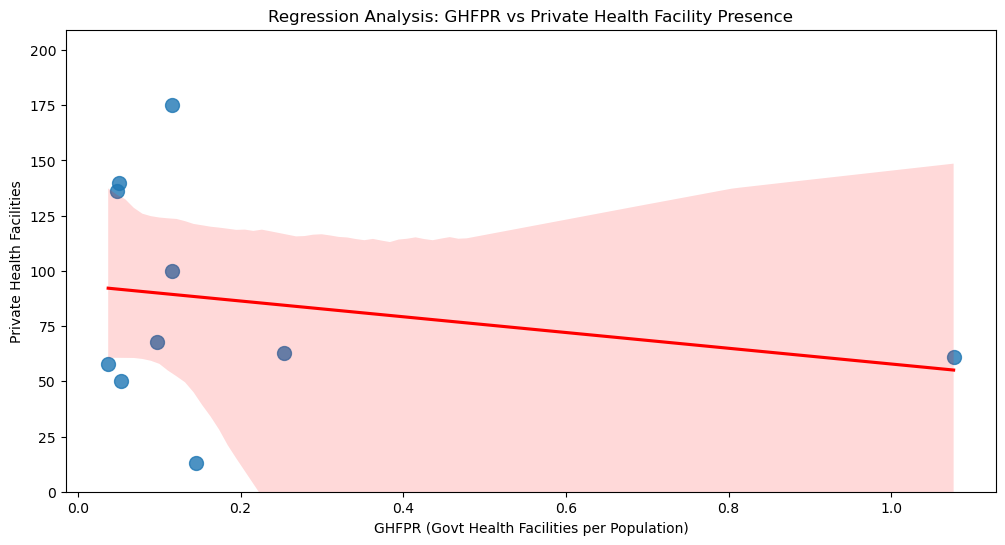

In [41]:
correlation_df = pivot_table_2[['ghfpr', 'private_facilities_operational']].reset_index()

# Computing regression statistics
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(correlation_df['ghfpr'], correlation_df['private_facilities_operational'])

print(f"Correlation coefficient (r): {r_value:.3f}")
print(f"P-value: {p_value:.3f}")

# Creating a regression plot
plt.figure(figsize = (12, 6))
sns.regplot(x ='ghfpr', y ='private_facilities_operational', data = correlation_df, scatter_kws = {'s':100}, line_kws = {'color':'red'})

plt.xlabel("GHFPR (Govt Health Facilities per Population)")
plt.ylabel("Private Health Facilities")
plt.ylim(0, None)
plt.title("Regression Analysis: GHFPR vs Private Health Facility Presence")
plt.savefig("Regression_Analysis.png", dpi=300, bbox_inches='tight')

plt.show()

- Weak and statistically insignificant correlation – The correlation coefficient (-0.225) suggests a weak negative relationship between government healthcare accessibility and private facility presence, as government facilities increase, private facilities slightly decrease. However, the high p-value (0.532) indicates this relationship is not statistically significant, meaning we cannot conclude a meaningful dependence.
- Private healthcare does not strictly compensate for government facility gaps – Despite previous findings showing greater private facility presence in areas with strained government health access (e.g., Kasarani, Embakasi), this plot suggests that private sector growth is not directly linked to lower GHFPR values in a predictable manner.
- Healthcare distribution is influenced by other factors – The low correlation implies that factors such as socioeconomic demand, urban density, and infrastructure investment may play a larger role in private facility distribution, rather than simply reacting to government accessibility gaps.

### Primary Health Care Service Gap Analysis:

1. What primary healthcare services are available in operational government facilities across all sub-counties?

#### Primary healthcare services available in operational government facilities across all sub-counties.

In [47]:
# Defining primary health care service categories
phc_groups = {
    'Maternal_Newborn_Services': ['has_ANC', 'has_CEOC', 'has_BEOC', 'has_PMTCT', 'has_CAES_SEC'],
    'Child_Health_Services': ['has_C_IMCI', 'has_EPI', 'has_GROWM'],
    'Infectious_Disease_Control_Services': ['has_ART', 'has_HCT', 'has_TB_DIAG', 'has_TB_LABS', 'has_TB_TREAT'],
    'Reproductive_Health_Services': ['has_FP', 'has_RHTC_RHDC', 'has_YOUTH'],
    'Emergency_Care_Services': ['has_BLOOD', 'has_IPD'],
    'Community_Services': ['has_HBC', 'has_OUTREACH'],
    'Diagnostic_Services': ['has_RAD_XRAY', 'has_OPD']
}

# Creating a pivot table to store categorized PHC services
pivot_table_3 = nairobi_df[['sub-county']].copy()

# Categorizing facilities based on PHC service groups
for group, columns in phc_groups.items():
    pivot_table_3[group] = nairobi_df[columns].sum(axis=1) 

# Grouping pivot_table_3 by sub-county to avoid redundant summation
pivot_table_3_grouped = pivot_table_3.pivot_table(
    values=['Maternal_Newborn_Services', 'Child_Health_Services',
            'Infectious_Disease_Control_Services', 'Reproductive_Health_Services', 'Emergency_Care_Services',
            'Community_Services', 'Diagnostic_Services'],
    index='sub-county',
    aggfunc='first'
)

print(pivot_table_3_grouped.head())

            Child_Health_Services  Community_Services  Diagnostic_Services  \
sub-county                                                                   
DAGORETTI                      15                  33                    0   
EMBAKASI                        9                  36                    0   
KAMUKUNJI                       9                  14                    0   
KASARANI                        7                  49                    0   
KIBRA                           3                  22                    0   

            Emergency_Care_Services  Infectious_Disease_Control_Services  \
sub-county                                                                 
DAGORETTI                        38                                   10   
EMBAKASI                         57                                   12   
KAMUKUNJI                        22                                   10   
KASARANI                         57                                   21 

<Figure size 1200x600 with 0 Axes>

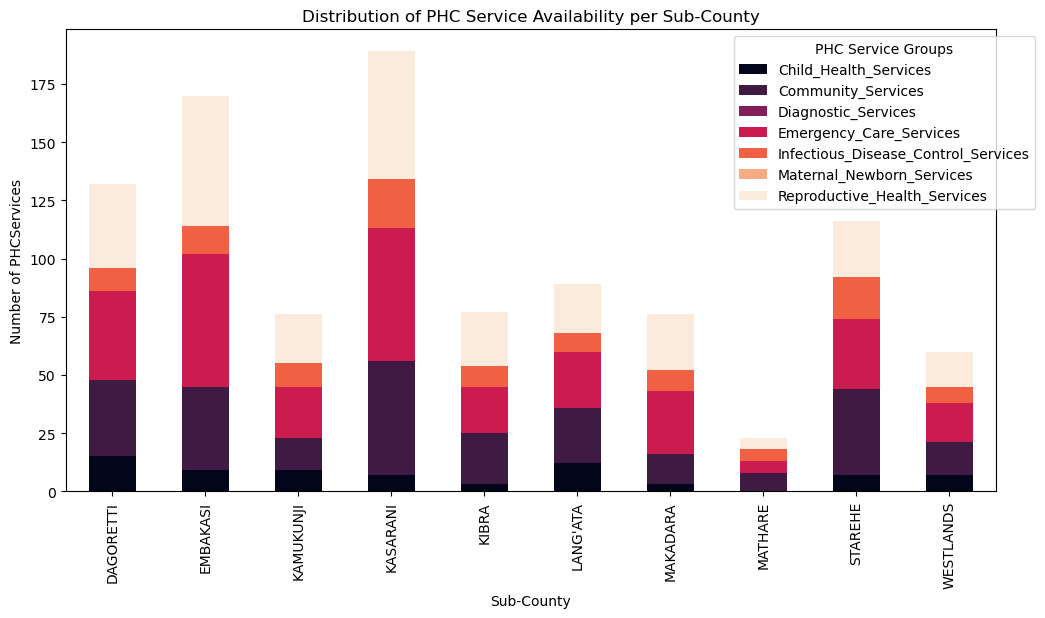

In [52]:
# Visualizing the results
plt.figure(figsize=(12, 6))

pivot_table_3_grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='rocket')

plt.xlabel("Sub-County")
plt.ylabel("Number of PHCServices")
plt.title("Distribution of PHC Service Availability per Sub-County")
plt.legend(title="PHC Service Groups", bbox_to_anchor=(1.05, 1))
plt.savefig("PHC_Distribution.png", dpi=300, bbox_inches='tight')

plt.show()

- Service disparities mirror government facility distribution – Sub-counties like Kasarani and Embakasi, which had relatively more operational government facilities, also offer a wider range of primary healthcare services. Conversely, sub-counties with low government facility accessibility (e.g., Mathare and Kamukunji) provide fewer essential services, reinforcing gaps in healthcare coverage.
- Strained sub-counties may experience service overload – Areas like Starehe and Kamukunji, previously identified as having extreme population strain per government facility, also have limited service availability. This suggests high patient demand with inadequate service provision, likely leading to longer wait times, resource shortages, and increased reliance on private healthcare.
- Comprehensive service availability supports healthcare resilience – Sub-counties with better facility-to-population ratios (e.g., Kibra and Kasarani) offer broader primary healthcare services, helping manage preventive care, infectious disease control, and emergency needs more effectively. This highlights the importance of balanced facility distribution for ensuring service adequacy.
- Investment in Maternal Health Services - Assuming the complete health facilities dataset, there was no information recorded on maternal services offerings such as Antenatal Care which is crucial for reducing maternal and neonatal mortalities that are crucial population health indicators.

### Step 3: Conclusion and Recommendations

Conclusion

The analysis highlights stark disparities in government health facility accessibility, with certain sub-counties facing extreme facility strain and an overwhelming reliance on private healthcare alternatives. Additionally, gaps in maternal health services indicate a critical shortfall in essential primary healthcare offerings, reinforcing the need for strategic investment and equitable distribution of resources.

Recommendations
- Expand government health facility coverage – Prioritize facility expansion in sub-counties with low GHFPR and high population strain to reduce overcrowding and improve service accessibility.
- Strengthen maternal and neonatal health services – Integrate Antenatal Care (ANC) and maternal health programs into all operational government facilities to address population health vulnerabilities.
- Optimize healthcare workforce allocation – Deploy additional healthcare providers to highly strained sub-counties to enhance service efficiency and mitigate patient congestion.
- Encourage public-private collaboration – Facilitate strategic partnerships between government and private healthcare providers in underserved sub-counties to enhance service availability.
- Leverage data for predictive healthcare planning – Utilize geospatial and statistical modeling to forecast demand trends, ensuring long-term, equitable healthcare development strategies.